<a href="https://colab.research.google.com/github/vanshikawadhwa/Iris-Dataset-Testing-ML-/blob/main/IRIS_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import torch

In [48]:
import torch.nn as nn

In [49]:
#helps move data forward in our function
import torch.nn.functional as F

In [50]:
#create a model class that inherites nn.module
class Model(nn.Module):
  #Input layer(4 features)-->Hidden layer1(some neurons)-->
  #H2(n)-->
  #output(3 classes of iris flowers)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate our nn.module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    #relu:rectified linear unit
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [86]:
#pick a random seed for randomisation
torch.manual_seed(31)
#create an instance of model
model=Model()

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [88]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [89]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [90]:
#covert text to numbers as ML works better with numbers
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)

/tmp/ipython-input-49240170.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


In [91]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [92]:
#train test split| set X->feature,y->outcome

In [93]:
X=my_df.drop('species',axis=1)
y=my_df['species']
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [94]:
#convert to numpy arrays
X=X.values
y=y.values

In [95]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)

In [98]:
#convert X features to tensors and y labels to tensors long
X_train=torch.FloatTensor(X_train)#FloatTensor as x are float
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)#longTensors are 64 bits int
y_test=torch.LongTensor(y_test)

In [99]:
#set the criterion of the model to measure the error, i.e how far is the prediction from the data
criterion=nn.CrossEntropyLoss()
#choose an adam optimizer, set learning rate(if error does not go down after learning(epochs) then we can lower learning rate)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [65]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [100]:
#train model
#epoch? (one run thru all the training data in our network)
epochs=100
losses=[]
for i in range(epochs):
  #go forward and get a prediction
  y_pred=model.forward(X_train) #get predicted results
  loss=criterion(y_pred,y_train)#measure the loss/error, gonna be high at first
  losses.append(loss.detach().numpy()) #keep track of losses

  #print every 10 epochs
  if i%10==0:
      print(f'epoch: {i} loss: {loss}')
  #do backpropogation:take error rate of forward propogation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.0937579870224
epoch: 10 loss: 0.9539112448692322
epoch: 20 loss: 0.7626267671585083
epoch: 30 loss: 0.5458598732948303
epoch: 40 loss: 0.40030142664909363
epoch: 50 loss: 0.30937087535858154
epoch: 60 loss: 0.22732803225517273
epoch: 70 loss: 0.15470436215400696
epoch: 80 loss: 0.1050168052315712
epoch: 90 loss: 0.07669716328382492


Text(0.5, 0, 'epoch')

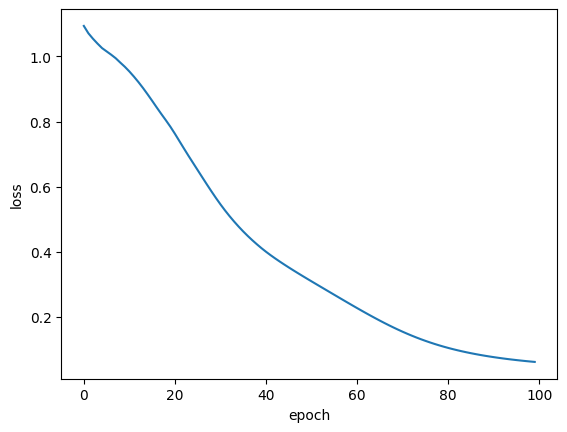

In [101]:
#graph out
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [104]:
#evaluate model on test data set(validate model on test set)
with torch.no_grad(): #basically turn off back propogation
  y_eval=model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss=criterion(y_eval,y_test) #find the loss
  print(f'loss: {loss}')

loss: 0.16704700887203217


In [105]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)

    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x="Versicolor"
    else:
      x="Virginica"

    print(f'{i+1:2}. {str(y_val):38} {x} {y_test[i]} {y_val.argmax().item()}')
    #correct or not
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'{correct} out of {len(y_test)} correct')

 1. tensor([-2.5889,  4.0099,  3.3087])    Versicolor 1 1
 2. tensor([-6.1569,  3.0656,  8.9168])    Virginica 2 2
 3. tensor([  7.4596,   2.7467, -10.7789]) Setosa 0 0
 4. tensor([-1.3433,  4.4380,  1.3247])    Versicolor 1 1
 5. tensor([-5.0828,  3.6717,  7.1432])    Virginica 2 2
 6. tensor([  7.4756,   2.7515, -10.8028]) Setosa 0 0
 7. tensor([-3.7170,  3.8108,  5.0555])    Virginica 2 2
 8. tensor([-0.9923,  4.5989,  0.7550])    Versicolor 1 1
 9. tensor([  8.8724,   3.1869, -12.8845]) Setosa 0 0
10. tensor([  7.9837,   2.9662, -11.5756]) Setosa 0 0
11. tensor([-4.3620,  3.5225,  6.1005])    Virginica 2 2
12. tensor([-2.1568,  4.4629,  2.5397])    Versicolor 1 1
13. tensor([-3.6323,  3.8182,  4.9262])    Virginica 2 2
14. tensor([  7.0996,   2.6377, -10.2427]) Setosa 0 0
15. tensor([-6.3743,  3.9411,  9.0113])    Virginica 2 2
16. tensor([-3.9081,  3.6396,  5.3878])    Versicolor 1 2
17. tensor([-3.0046,  3.9974,  3.9362])    Versicolor 1 1
18. tensor([-2.2144,  4.2685,  2.6778]) 

In [106]:
new_iris=torch.tensor([4.7,3.2,1.3,0.2])

In [108]:
with torch.no_grad():
  print(model(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([  7.5121,   2.7626, -10.8571])
0


In [110]:
new_iris=torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([-4.3803,  3.5343,  6.1247])
2


In [111]:
#save our NN model
torch.save(model.state_dict(),'my_iris_model.pt')

In [114]:
#load the saved model
new_model=Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [115]:
#make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)